In [1]:
import os 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import custom functions
os.chdir('..')
from RuckFunctions import DataLoading, Preprocessing, DirectionalCorrelation


Load data

In [2]:
# Initialize path to data (UTM-converted datasets)
data_dir = os.getcwd() + '\\SampleData'

# Load datasets
raw_datasets = DataLoading.load_data(data_dir)

# Re-shape datasets
datasets = DataLoading.pivot_datsets(raw_datasets)

Get the interpolated data

In [3]:
# get interpolated datasets
interp_datasets = Preprocessing.interpolate_datasets(datasets, threshold = 0.99)

Get movement periods


In [4]:
# get slices for movement periods and break times   
rucks_bySquad, rests_bySquad, all_stops = Preprocessing.get_slices_byArea(interp_datasets, plot=False)

Get an just one example squad's data

In [5]:
rucks = rucks_bySquad[1]

Get the smoothed data


In [6]:
smooth_rucks = Preprocessing.spline_smoothing(rucks, s=3e1, UTM=True)

Get leadership metrics

In [7]:
names = smooth_rucks[0].UTM_x.columns
time_delay_dfs, HCS_ratio_dfs, graphs = DirectionalCorrelation.get_directional_corr(smooth_rucks, names=names, UTM=True, window_length = 9)

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [04:46<00:00, 40.88s/it]


This gives us a 'leadership score' from the average time-delay for each individual
<br>
The more positive the time-delay, the more directional influence that individual has

In [8]:
time_delay_dfs[0].mean()


Member 1    0.028342
Member 2    0.086318
Member 3   -0.098910
Member 4   -0.046654
Member 5    0.072385
Member 6   -0.068123
Member 7   -0.091568
Member 8    0.128615
dtype: float64

We also get a metric for  Highly Correlated Segments (HCS)<br>
This is the ratio of time an individual is highly correlated with other individuals while they are within proximity

In [9]:
HCS_ratio_dfs[0].mean()

Member 1    0.788374
Member 2    0.875661
Member 3    0.847850
Member 4    0.866153
Member 5    0.832689
Member 6    0.829647
Member 7    0.811997
Member 8    0.796939
dtype: float64

Plot leadership graphs for each movement period 


The Y axis location of nodes represents the time-delay (leadership score) value, while the X axis is arbitrary<br>
The edges point from leader to follower with a specific directional correlation time-delay for that pair<br>

The Quality of the heirarchy is considered the ratio of arrows pointing downards (from high leadership score to low leadership score)<br>
The number of loops should be close to zero

We mark the individual who is Squad leader with green and the platoon leaders with blue

MovieWriter ffmpeg unavailable; using Pillow instead.


animation saved to c:\Users\James\GitRepos\GPS-ruck\..\Figures\Pairwise_Leadership_AnimationSquad_2.gif


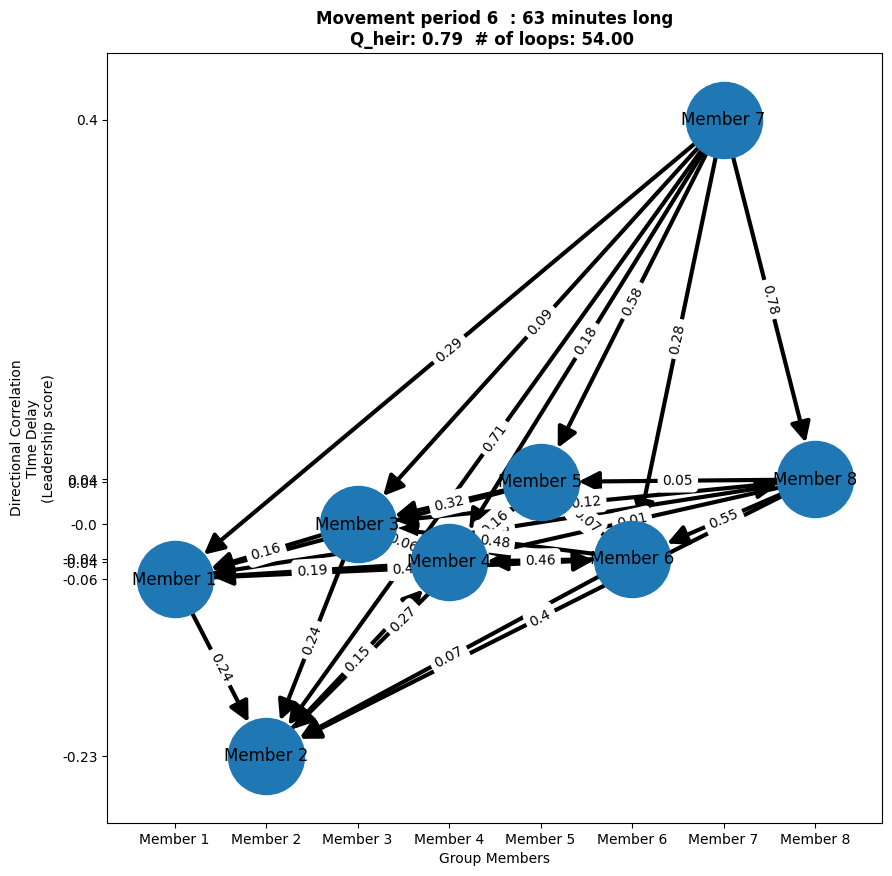

In [10]:
sq_name = smooth_rucks[0].attrs['name'].split('.')[0]
ani = DirectionalCorrelation.leadership_graph_ani(time_delay_dfs, graphs, names, sq_name, show=False)
print('animation saved to ' + os.getcwd() + r'\..\Figures\Pairwise_Leadership_Animation'+sq_name+'.gif')